In [83]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import IPython.display as dsp

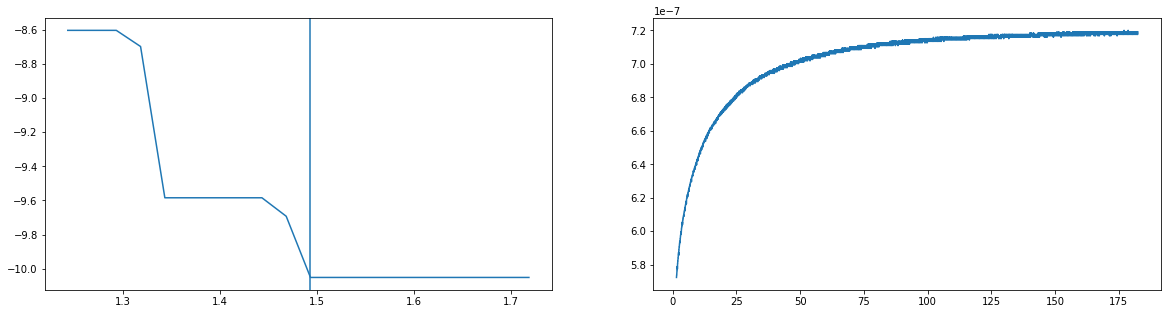

In [84]:
fname = 'default6.csv'
fname = '4plate_v1/P10min_A500m_S1p/acq0001.csv'
dat = np.loadtxt(fname, delimiter=',', dtype=np.float64, skiprows=21)
ds = dat[:,2]
start = np.argmax(np.abs(ds - ds[-1]) < 0.1)
xs = dat[start:,0]
ys = dat[start:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(dat[start-10:start+10,0],dat[start-10:start+10,2])
plt.axvline(dat[start,0])

plt.subplot(1,2,2)
plt.plot(xs, ys)

In [85]:
def rsquared(ys,fs):
    mean = np.mean(ys)
    SStot = np.sum(np.square(ys-mean))
    SSres = np.sum(np.square(ys-fs))
    return 1-(SSres/SStot)

In [86]:
def compute_rsquared_data(F, p0, xs, ys):
    N = 200
    rs = []
    fails = 0
    total = 0
    [p0, _] = curve_fit(F, xs, ys, p0=p0, maxfev=1000)
    for i in range(1,N+1):
        total += 1
        dsp.clear_output()
        string = ""
        string += "Progress: %.2f%%   " % (i/N*100)
        string += "Failed: %.2f%%   "%(fails/total*100)
        string += "P0: %s" % (str(p0))
        dsp.display_pretty(string)
        end = int(len(xs)*i/N)
        try:
            [cvec, _] = curve_fit(F, xs[:end], ys[:end], p0=p0, maxfev=2000)
        except:
            fails += 1
            cvec = p0*0
        rs += [rsquared(ys, F(xs,*cvec))]
    return rs


'Progress: 100.00%   Failed: 7.50%   P0: [-3.64274784e-06  1.22184385e+01 -1.22517459e+00  7.25449876e-07]'

R^2: 0.99908


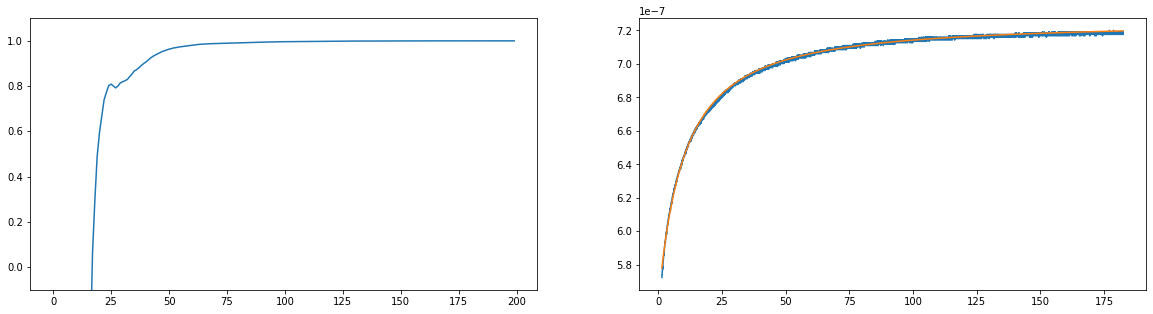

In [87]:
def F(x, a, w, b, c): return a*np.power(x+w,b)+c
p0 = [1, 30, -1, 0]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
rs = compute_rsquared_data(F, p0, xs, ys)
plt.plot(rs)
plt.ylim(-0.1,1.1)
print("R^2: %.5f"%(rs[-1]))

[cvec, _] = curve_fit(F, xs, ys, p0=p0, maxfev=1000)

plt.subplot(1,2,2)
plt.plot(xs, ys)
plt.plot(xs, F(xs,*cvec))

'Progress: 100.00%   Failed: 0.00%   P0: [ 2.44011978e-08 -1.41683149e+00  6.00623453e-07]'

R^2: 0.94752


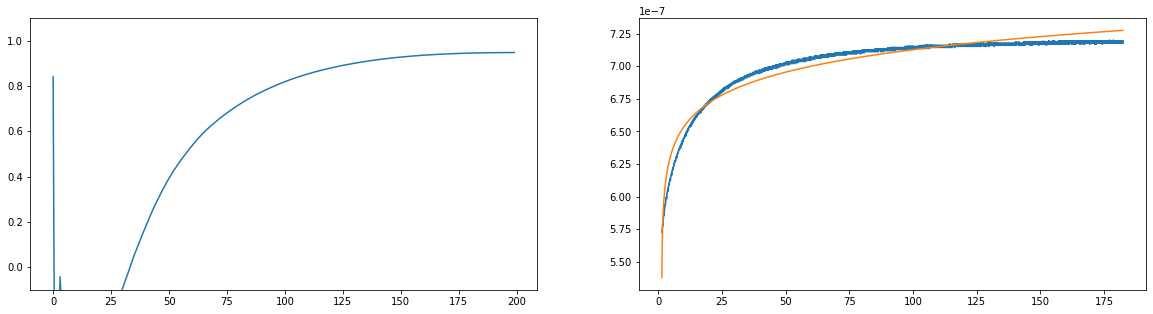

In [88]:
def F(x, a, w, c): return a*np.log(x+w)+c
p0=[1, 100, 0]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
rs = compute_rsquared_data(F, p0, xs, ys)
plt.plot(rs)
plt.ylim(-0.1,1.1)
print("R^2: %.5f"%(rs[-1]))

[cvec, _] = curve_fit(F, xs, ys, p0=p0, maxfev=1000)

plt.subplot(1,2,2)
plt.plot(xs, ys)
plt.plot(xs, F(xs,*cvec))